#DATA SYNOPSIS

In [1]:
#this programm uses an artificial reccurent neural network called Long Short Term memory
# to predict crypto or stocks closing price in future
#Crypto calci using keras in python
#step1: data extraction or importing from the project.
#step2: creating data frames and using some operations like sorting and shape.
#step3: plotting the data using mathplotlib.pyplot and depicting it in different chart styles.
#step4: scaling the data
#step5: getting the train dataset(sample) from the testdata(whole population)
#step6: calculating the RSME(root mean square error), using models and calculating the output.
#step7: inverse scaling and presenting the predicted output.

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM,Dense
from keras.models import Sequential
import datetime as dt
plt.style.use("fivethirtyeight")

In [3]:
from tensorflow import keras
from sklearn.metrics import mean_squared_error

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf

In [6]:
ticker00a001 = ["ETH" , "BCH", "LTC", "BSV", "BNB"]#, "ADA", "DOT", "LINK", "XLM", "DOGE"]#,"USDT", "USDC", "BUSD", "DAI", "TUSD", "PAX", "GUSD", "UST", "HUSD", "CEL"]
currencies = ["USD", "GBP", "INR", "EUR", "RUB", "JPY", "CAD", "AUD"]
currency = input(f"select the currencies from {currencies} : ").upper()
def coin_currency_load_func(ticker00a001,currencies):
  for i in range(len(ticker00a001)):
    ticker00a001[i] = f"{ticker00a001[i]}-{currencies}"
  print("The coins analysed are : ",ticker00a001)
  #loading todays date
  date_today = dt.date.today()
  date_today_str = dt.datetime.strftime(date_today, "%Y-%m-%d")
  print("The coins are Predicted and analysed till : ",date_today_str)
  #give date  to the model
  date_time_str = date_today_str
  #importing postive and negative correlated crypto
  dataframe00a001 = yf.download(ticker00a001,start="2020-01-01", end=date_time_str)
  with pd.option_context("display.max_columns",None):
    print(dataframe00a001.head(1))
  return dataframe00a001
dataframe00a001 = coin_currency_load_func(ticker00a001,currency)

select the currencies from ['USD', 'GBP', 'INR', 'EUR', 'RUB', 'JPY', 'CAD', 'AUD'] : INR
The coins analysed are :  ['ETH-INR', 'BCH-INR', 'LTC-INR', 'BSV-INR', 'BNB-INR']
The coins are Predicted and analysed till :  2024-08-22


[*********************100%%**********************]  5 of 5 completed


Price          Adj Close                                                     \
Ticker           BCH-INR     BNB-INR      BSV-INR      ETH-INR      LTC-INR   
Date                                                                          
2020-01-01  14558.826172  975.045959  6923.489258  9316.764648  2992.837891   

Price              Close                                                     \
Ticker           BCH-INR     BNB-INR      BSV-INR      ETH-INR      LTC-INR   
Date                                                                          
2020-01-01  14558.826172  975.045959  6923.489258  9316.764648  2992.837891   

Price             High                                                     \
Ticker         BCH-INR     BNB-INR      BSV-INR      ETH-INR      LTC-INR   
Date                                                                        
2020-01-01  14826.5625  988.588013  7114.770996  9465.183594  3013.019043   

Price                Low                                 

In [7]:
!pip install pycoingecko

In [8]:
# Max and min price values of each coin
with pd.option_context("display.max_columns",None):
  print(dataframe00a001.describe().loc[["max","min"]])

Price       Adj Close                                             \
Ticker        BCH-INR       BNB-INR       BSV-INR        ETH-INR   
max     113175.976562  59302.324219  32911.863281  355703.531250   
min       7268.237305    697.439880   1978.686279    8218.680664   

Price                         Close                              \
Ticker       LTC-INR        BCH-INR       BNB-INR       BSV-INR   
max     28323.189453  113175.976562  59302.324219  32911.863281   
min      2302.389648    7268.237305    697.439880   1978.686279   

Price                                         High                \
Ticker        ETH-INR       LTC-INR        BCH-INR       BNB-INR   
max     355703.531250  28323.189453  119979.671875  60163.578125   
min       8218.680664   2302.389648    7997.689941    768.881714   

Price                                                       Low               \
Ticker       BSV-INR        ETH-INR       LTC-INR       BCH-INR      BNB-INR   
max     36662.214844  364

# RSS feeders

In [9]:
!pip install feedparser

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 2.4 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6047 sha256=7a915d64edcf543aa1d3618f0999f79c55569ea614461a3ac50efbc6000a15f4
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [10]:
import feedparser

def get_cryptocurrency_feeds(symbol):
    feeds = [
        f"https://cointelegraph.com/rss/tag/{symbol}",
        f"https://news.google.com/rss/search?q={symbol}%20crypto&hl=en-US&gl=US&ceid=US:en",
        f"https://cryptonews.com/news/tag/{symbol}/rss/",
        f"https://www.coindesk.com/feed",
        f"https://www.cryptoglobe.com/latest/feed/",
        f"https://decrypt.co/feed/",
    ]
    return feeds

In [11]:
def get_feed_items(feed_url):
    feed = feedparser.parse(feed_url)
    items = [
        {"title": entry.title, "link": entry.link}
        for entry in feed.entries
    ]
    return items

In [12]:
# getting the feeds for first slected coin
symbol = ticker00a001[0]
feeds = get_cryptocurrency_feeds(symbol)
total_feeds = 0
for feed in feeds:
    items = get_feed_items(feed)
    items = items[:10]
    for item in items:
        print(item["title"], item["link"])
        # pass
    # total_feeds+=(len(items))
# total_feeds

Why Is the Crypto Market Rising Today? - Forbes https://news.google.com/rss/articles/CBMiigFBVV95cUxNRl92OC1XNjRGYWhaSUU1WlRUYktWTjA2QS1XLXA2NVBfczZseEJ5alNqUkVEVy1mczdwNXVYdzJZajlldTRiM19yTVBvZDhSNnNXYkQ3Ul9LZkRObDFNeTdNZW5mUGR5dkJvTU5yUE9LaTdxSWdLc2c1YnZVZUZ6MklZaU9qc0lsRlE?oc=5
How To Buy Ethereum Instantly In August 2024 - Forbes https://news.google.com/rss/articles/CBMihgFBVV95cUxPeXhiQnktY0lMVU9EREdQbW15QzZKVnpjMmpva3g2b2ZTS3E0cVV1MXJ1ZlRYOHJ5d2lQcC1FR09jalFyYlhvd05zbW9PMTJjTDNGVVh4STFsQWwtaTBGRXI1QjFraFZBNkc0OEF4bWFRaXA2aEllaXNZc1RoUDJWZ0FmbDQxdw?oc=5
Crypto News: Latest Cryptocurrency News, Bitcoin News and Cryptocurrency Price Data - NDTV Profit https://news.google.com/rss/articles/CBMiSEFVX3lxTE5GRGFWa0dNMko3dnVEWGU1Uk9DWC0teXpYblpwT0VwS09ic2RFOHRiOTROT29UQVRXTzNGNVRyVWtsZzZoMmxoMw?oc=5
Guide to Crypto Tax in India [Updated 2024] - CoinDCX https://news.google.com/rss/articles/CBMicEFVX3lxTE1uLTVwZkVyNkhkeG5IcURLTkxUVXdwbVF5RzNiTjJtYlZDSWNMdUVUZGY4MndhQlBveVVMNW5CNjhEY3Q3cGhwM

# DATA CLEANING

In [13]:
df  = dataframe00a001
df['Date'] = df.index
# df.index = np.arange(len(df))

In [14]:
#get the number of rows and number of columns
print(df.shape)

(1695, 31)


In [15]:
#describing the data
print(df.tail())
print(df.columns)
print(df.dtypes)


Price          Adj Close                                            \
Ticker           BCH-INR       BNB-INR      BSV-INR        ETH-INR   
Date                                                                 
2024-08-17  28386.443359  43606.988281  3578.532471  217476.671875   
2024-08-18  28602.492188  45474.289062  3565.665771  219268.046875   
2024-08-19  27963.566406  44589.386719  3552.348389  219198.875000   
2024-08-20  28358.861328  46955.832031  3544.454346  221208.906250   
2024-08-21  28107.833984  47699.648438  3566.005615  215604.109375   

Price                           Close                             \
Ticker          LTC-INR       BCH-INR       BNB-INR      BSV-INR   
Date                                                               
2024-08-17  5582.749023  28386.443359  43606.988281  3578.532471   
2024-08-18  5667.875488  28602.492188  45474.289062  3565.665771   
2024-08-19  5567.994141  27963.566406  44589.386719  3552.348389   
2024-08-20  5566.746582  28358.

In [16]:
print(round(df.describe(),3))

Price    Adj Close                                                    Close  \
Ticker     BCH-INR    BNB-INR    BSV-INR     ETH-INR    LTC-INR     BCH-INR   
count     1695.000   1695.000   1695.000    1695.000   1695.000    1695.000   
mean     24954.101  22392.944   8592.390  150268.695   7528.479   24954.101   
min       7268.237    697.440   1978.686    8218.681   2302.390    7268.237   
25%      15685.594  16754.702   3884.320   96563.707   4790.418   15685.594   
50%      20464.191  23123.373   6775.505  147484.359   6336.505   20464.191   
75%      33857.854  30023.666  12608.238  216967.109   8820.638   33857.854   
max     113175.977  59302.324  32911.863  355703.531  28323.189  113175.977   
std      14614.965  14537.567   5472.276   90041.068   3968.839   14614.965   

Price                                                ...       Open  \
Ticker    BNB-INR    BSV-INR     ETH-INR    LTC-INR  ...    BNB-INR   
count    1695.000   1695.000    1695.000   1695.000  ...   1695.000

In [17]:
# checking the null values in the dataset
with pd.option_context("display.max_rows",None):
  print(df.isna().sum())

Price      Ticker 
Adj Close  BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Close      BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
High       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Low        BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Open       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Volume     BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Date                  0
dtype: int64


In [18]:
#removing the last row as we cannot find some values beacause of no data for today or yesterday
df  = df.drop(df.index[-1])
print(df.tail(3))

Price          Adj Close                                            \
Ticker           BCH-INR       BNB-INR      BSV-INR        ETH-INR   
Date                                                                 
2024-08-18  28602.492188  45474.289062  3565.665771  219268.046875   
2024-08-19  27963.566406  44589.386719  3552.348389  219198.875000   
2024-08-20  28358.861328  46955.832031  3544.454346  221208.906250   

Price                           Close                             \
Ticker          LTC-INR       BCH-INR       BNB-INR      BSV-INR   
Date                                                               
2024-08-18  5667.875488  28602.492188  45474.289062  3565.665771   
2024-08-19  5567.994141  27963.566406  44589.386719  3552.348389   
2024-08-20  5566.746582  28358.861328  46955.832031  3544.454346   

Price                                   ...          Open               \
Ticker            ETH-INR      LTC-INR  ...       BNB-INR      BSV-INR   
Date                  

In [19]:
with pd.option_context("display.max_rows",None):
  print((df.isna().sum()))

Price      Ticker 
Adj Close  BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Close      BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
High       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Low        BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Open       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Volume     BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Date                  0
dtype: int64


In [20]:
# removing null values containing columns
df = df.dropna(axis = 1)

In [21]:
with pd.option_context("display.max_rows",None):
  print(df.isna().sum())

Price      Ticker 
Adj Close  BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Close      BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
High       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Low        BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Open       BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Volume     BCH-INR    0
           BNB-INR    0
           BSV-INR    0
           ETH-INR    0
           LTC-INR    0
Date                  0
dtype: int64



# DATA VISUALIZATION

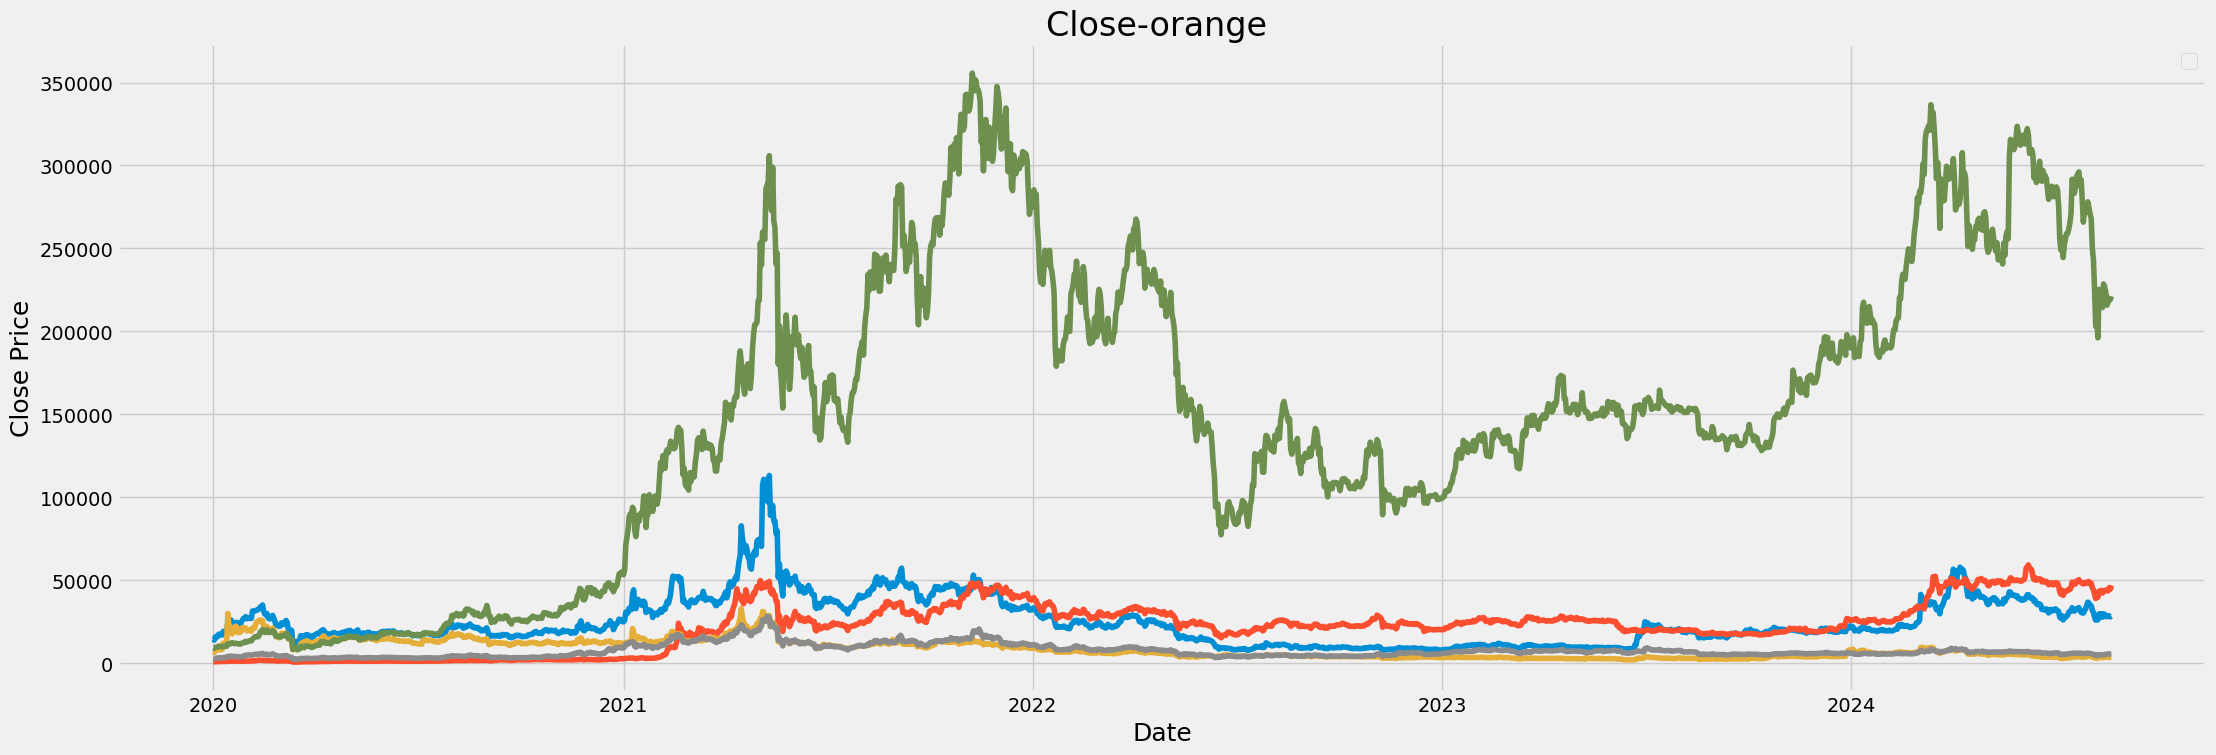

In [22]:
#visualize the closing price history
plt.figure(figsize=(24,8))
plt.title("Close-orange " , fontsize = 24)
plt.plot(df["Date"],df["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price", fontsize=18 )
plt.legend()
plt.show()


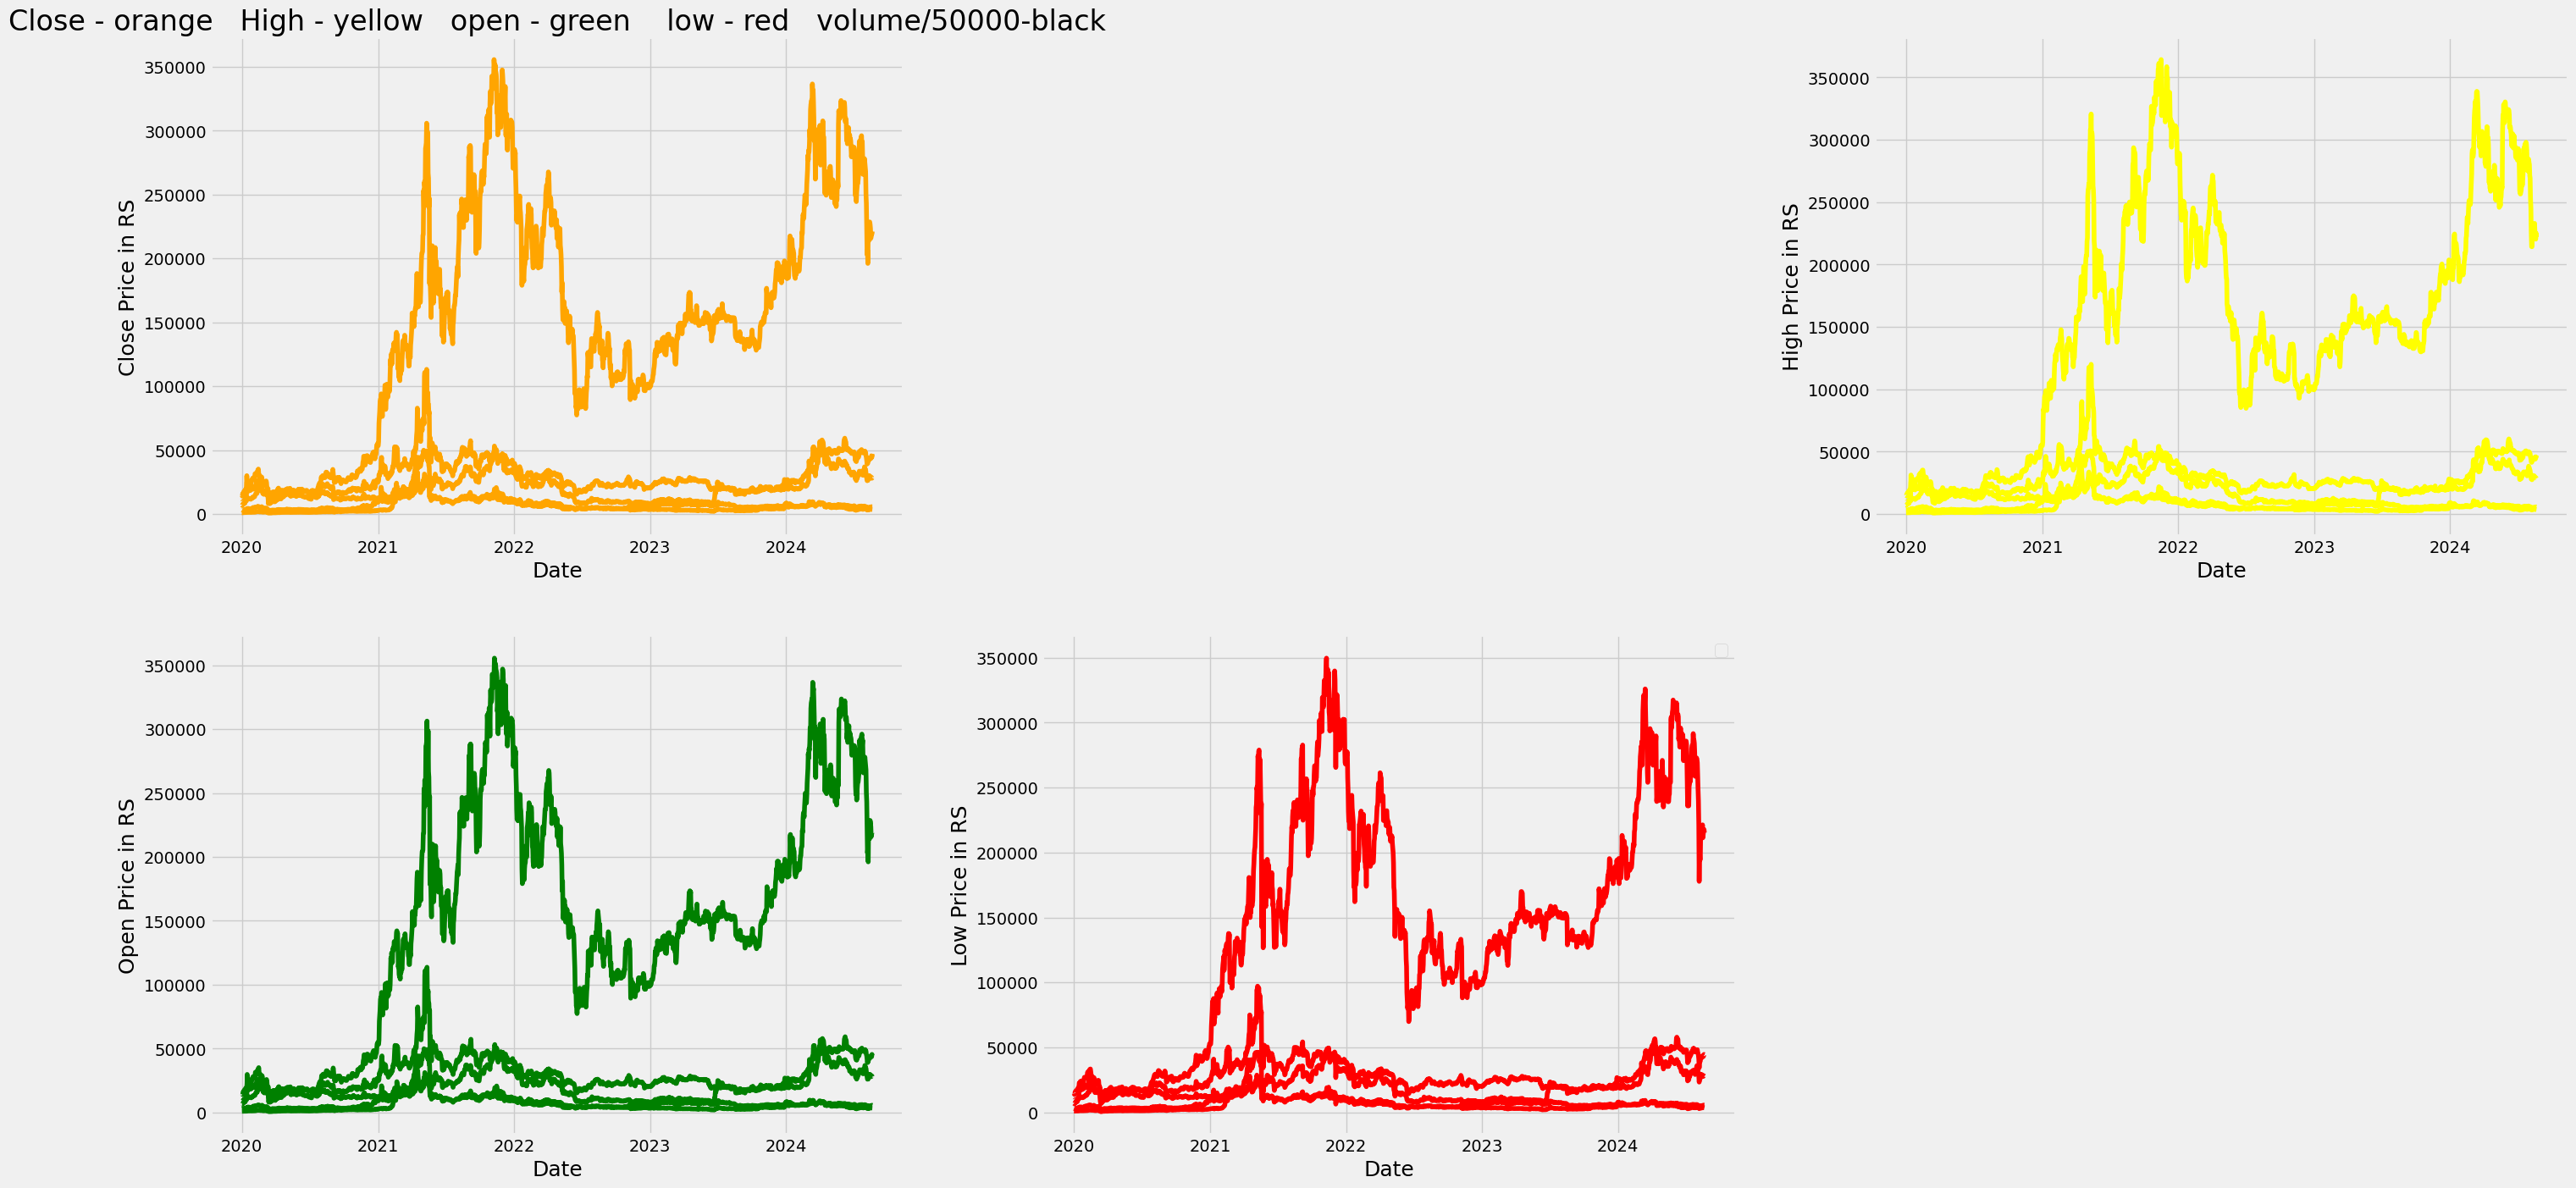

In [23]:
plt.figure(figsize=(32,16))
plt.subplot(2,3,1)
plt.title("Close - orange   High - yellow   open - green    low - red   volume/50000-black" , fontsize = 24)
plt.plot(df["Date"], df["Close"] ,color="orange")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price in RS", fontsize=18 )
# plt.subplot(2,3,2)
# plt.plot(df["High"],df["Low"])
# plt.xlabel("High", fontsize=18)
# plt.ylabel("Low Price in RS", fontsize=18 )
plt.subplot(2,3,3)
plt.plot(df["Date"],df["High"],color='yellow')
plt.xlabel("Date", fontsize=18)
plt.ylabel("High Price in RS", fontsize=18 )
plt.subplot(2,3,4)
plt.plot(df["Date"],df['Open'],color="green")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Price in RS", fontsize=18 )
plt.subplot(2,3,5)
plt.plot(df["Date"],df["Low"],color="red")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Low Price in RS", fontsize=18 )
# plt.subplot(2,3,6)
# plt.plot(df["Date"],df["Volume"]/7500000,color='black')
# plt.xlabel("Date", fontsize=18)
# plt.ylabel("Volume", fontsize=18 )
plt.legend()
plt.show()

# FEATURE ENGINEERING

In [24]:
data1 = df["Close"]
type(data1)

pandas.core.frame.DataFrame

In [25]:
# print(data1.columns)

In [26]:
print(list(data1.keys()))

['BCH-INR', 'BNB-INR', 'BSV-INR', 'ETH-INR', 'LTC-INR']


enter moving average size : 25


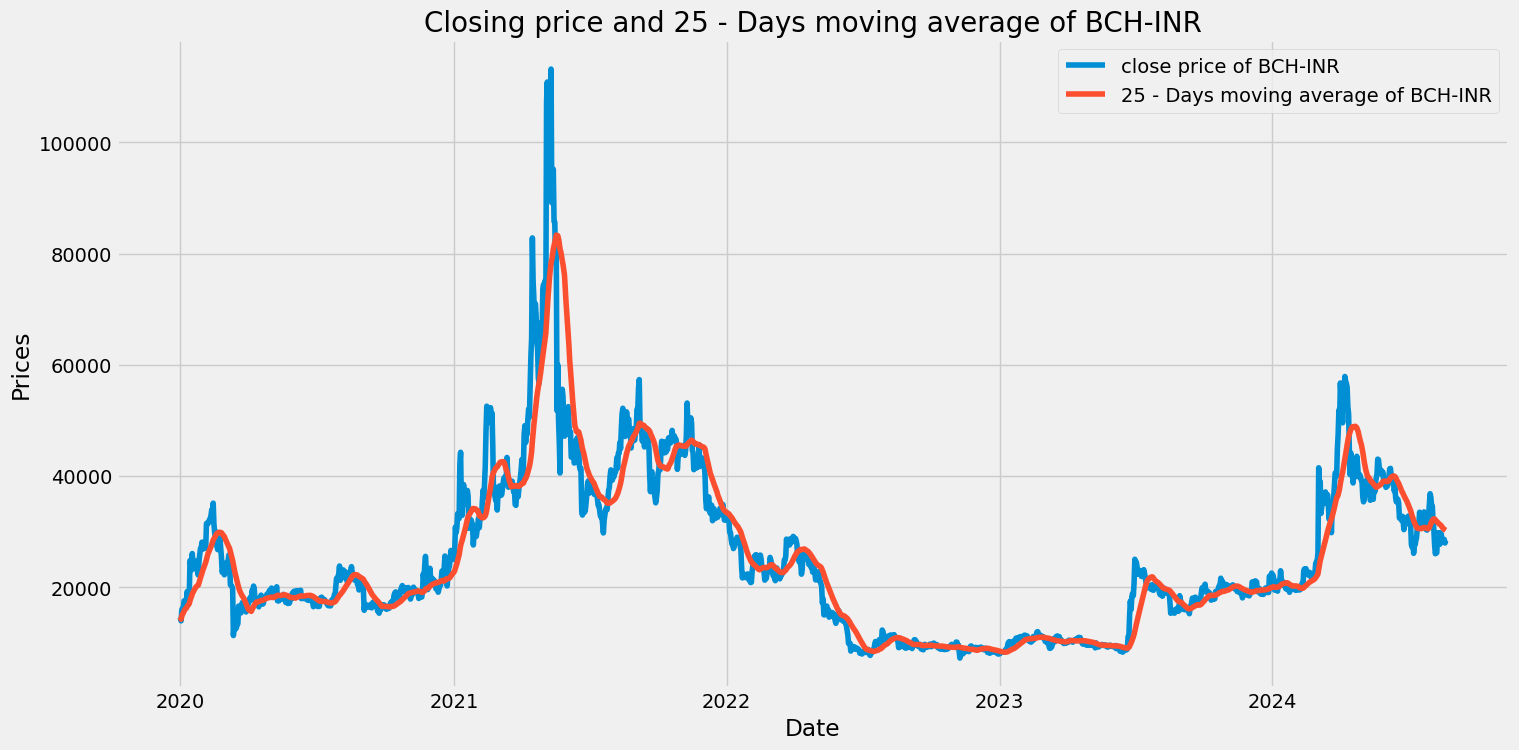

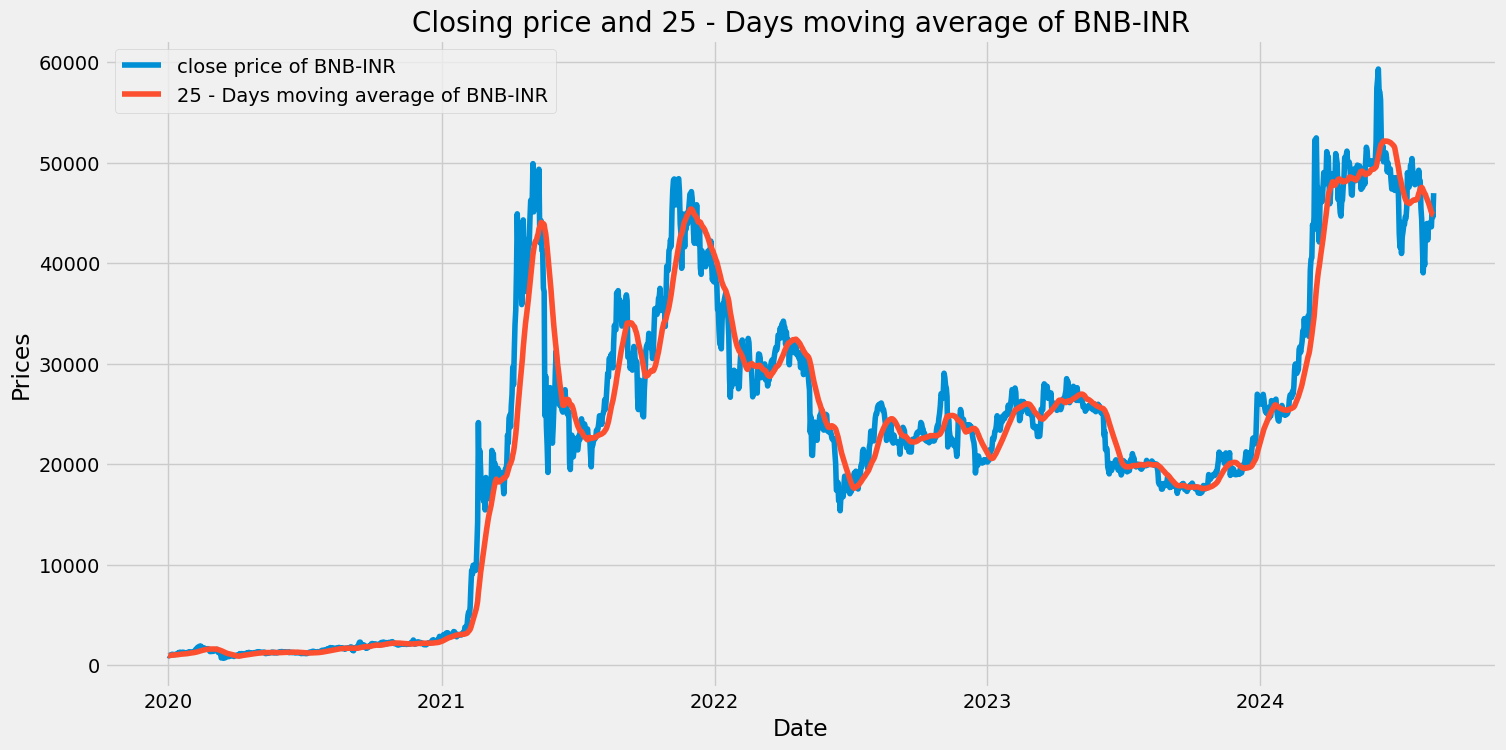

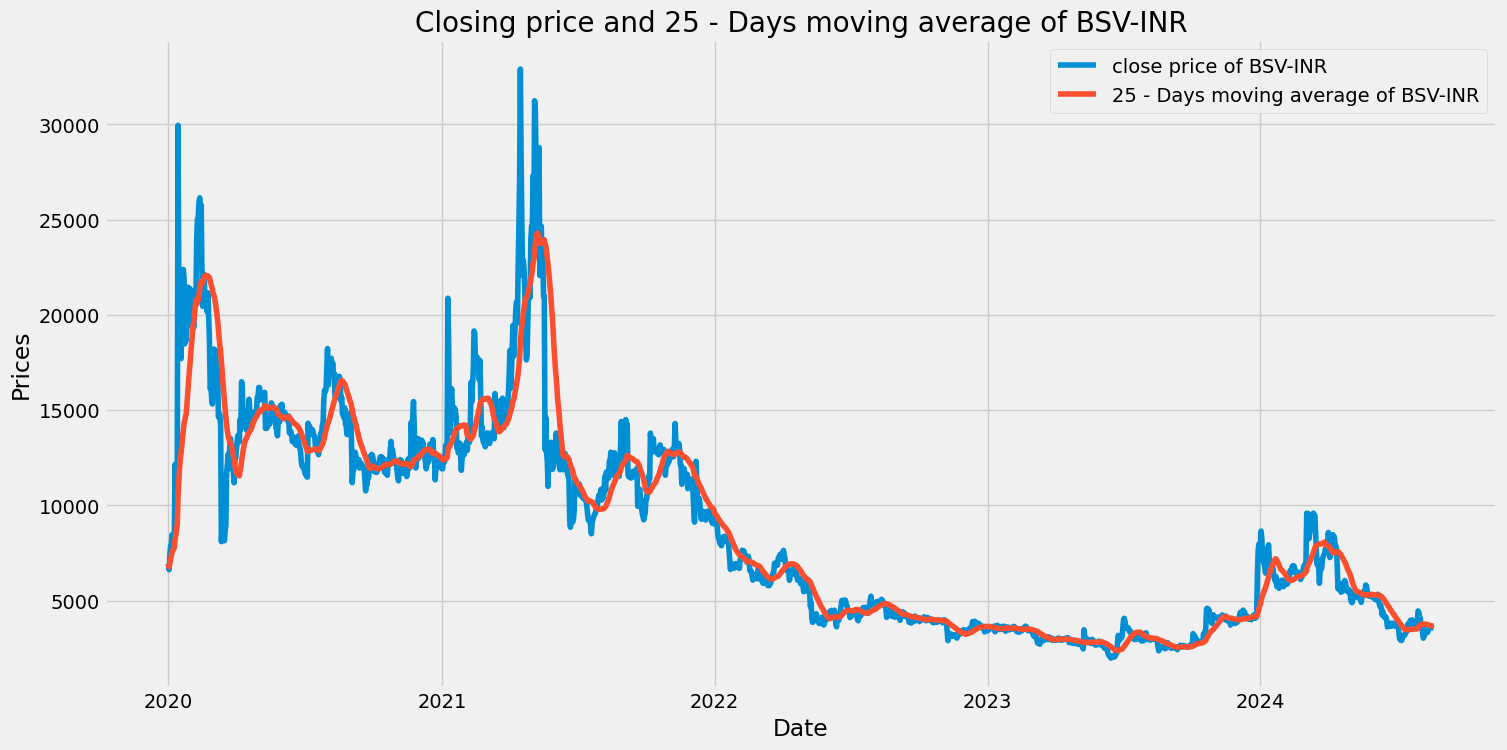

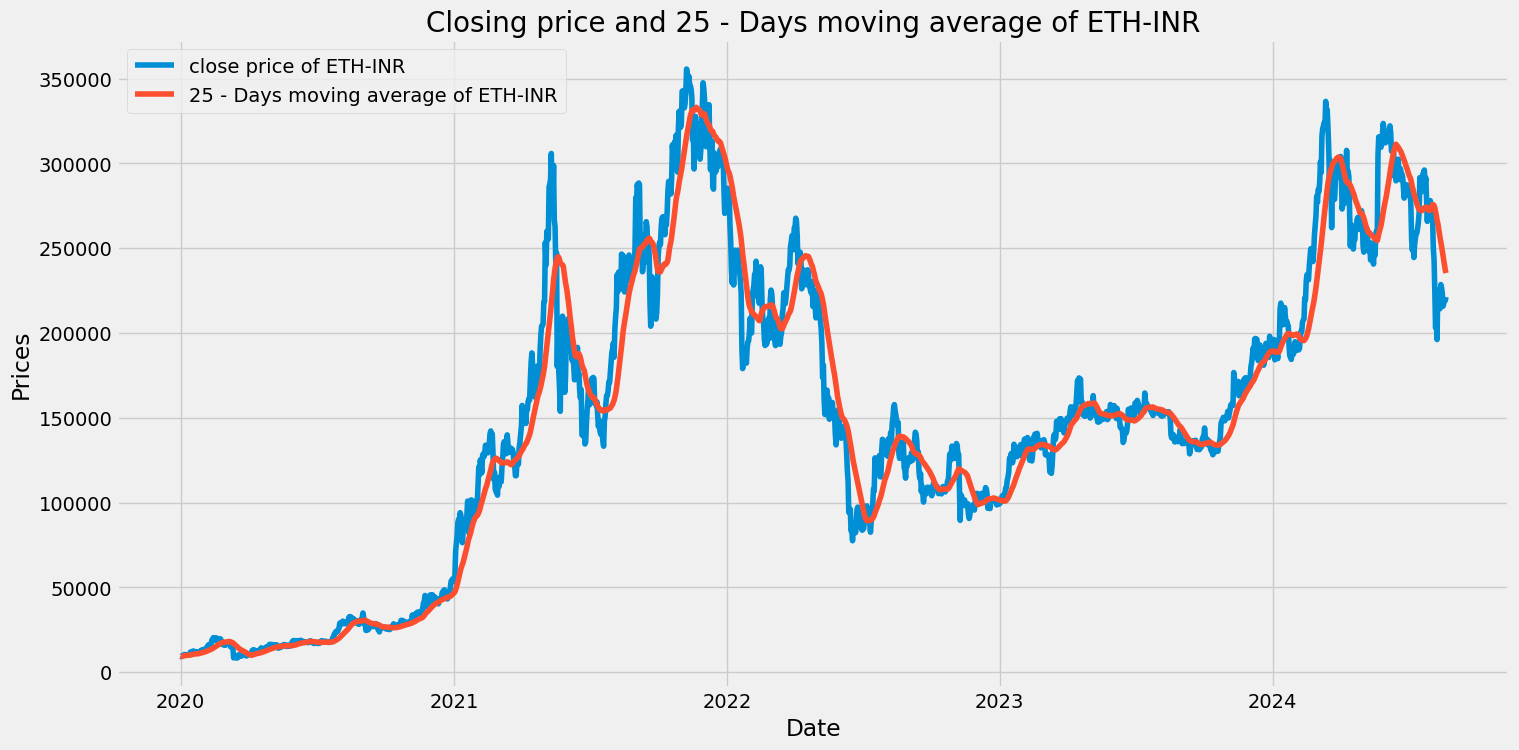

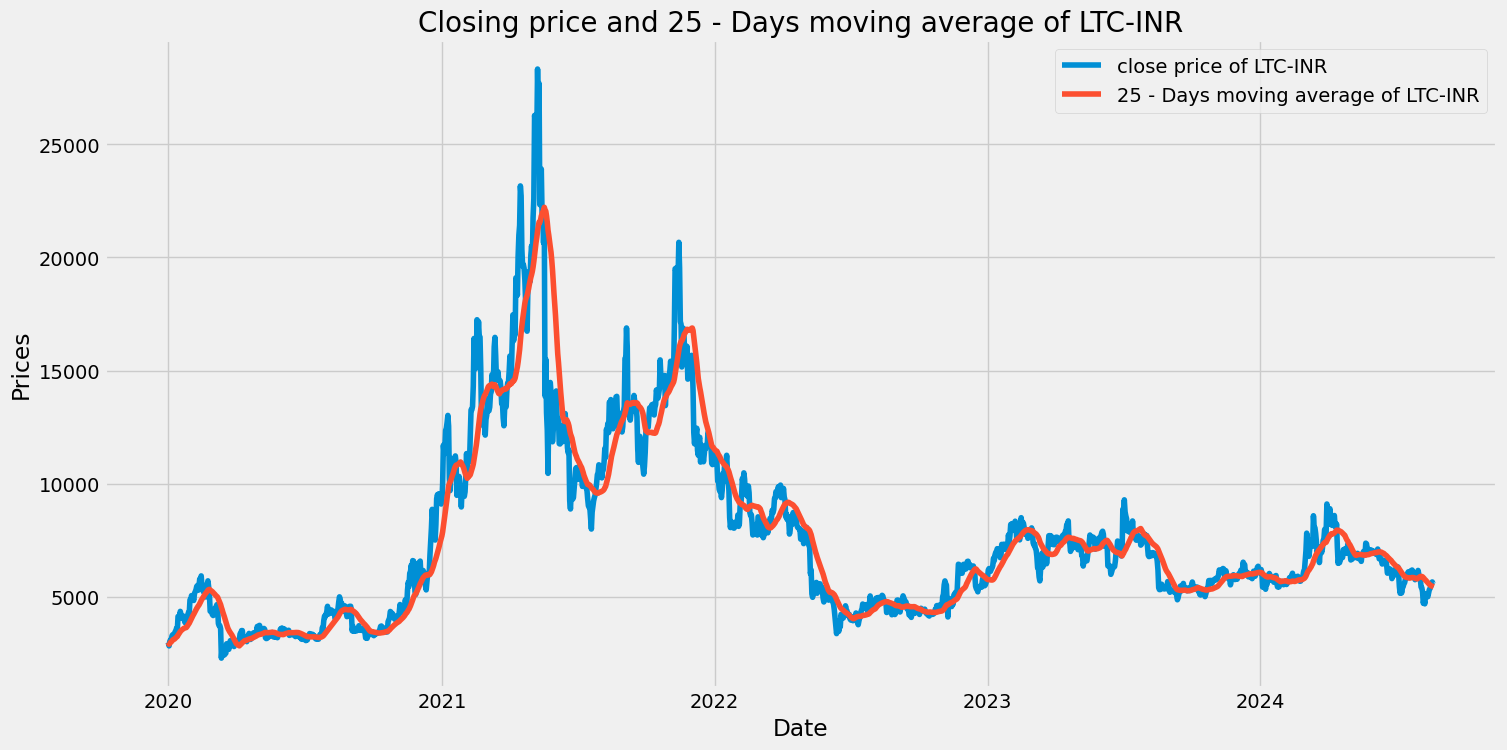

In [27]:
def moving_avg_func(data1,size_of_avg,coinname):
  plt.figure(figsize=(16,8))
  ma_avg = data1.rolling(size_of_avg,min_periods = 1).mean()
  plt.plot(data1,label = f"close price of {coinname}")
  plt.plot(ma_avg,label = f"{size_of_avg} - Days moving average of {coinname}")
  plt.xlabel("Date")
  plt.ylabel("Prices")
  plt.title(f"Closing price and {size_of_avg} - Days moving average of {coinname}",size = 20)
  plt.legend()
  plt.show()
size_of_avg = int(input("enter moving average size : "))
for i in list(data1.keys()):
  moving_avg_func(data1[i],size_of_avg,i)

# FEATURE SCALING

In [28]:
def scaling_and_model_function(dataset,coinname,training_data_len):
  #Scale the data
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data=scaler.fit_transform(dataset)
  print(scaled_data)
  #create the training dataset
  #create the scaled training dataset
  train_data= scaled_data[0: training_data_len , :]
  #split the data into x train and y train
  x_train = []
  y_train = []
  for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
      print("i am xtrain",x_train)
      print("i am ytrain",y_train)
      print()
  #convert the x train and y train to numpy arrays
  x_train,y_train=np.array(x_train),np.array(y_train)
  #Reshape the data
  x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
  print(x_train.shape)
  #Build the LSTM model
  model = Sequential()
  model.add(LSTM(50,return_sequences= True,input_shape = (x_train.shape[1],1)))
  model.add(LSTM(50,return_sequences= False))
  model.add(Dense(25))
  model.add(Dense(1))
  #compile the model
  model.compile(optimizer='adam', loss="mean_squared_error",)
  #train the model
  model.fit(x_train[::20],y_train[::20],batch_size=1,epochs=2)
  #create the testing data set
  #create a new array containing scales values from 1954 to 2517
  test_data = scaled_data[training_data_len-60 :, :]
  #creatiing data sets x_test and y_test
  x_test=[]
  y_test=dataset[training_data_len:,:]
  for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
  #convert the data to a numpy array
  x_test=np.array(x_test)
  #reshape the data
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1 ))
  #get the model prediction
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)
  predictions = predictions.astype(float)
  #plot the data
  train=data[:training_data_len]
  valid=data[training_data_len : ]     #test size ...........
  #rsme
  rmse = np.sqrt(mean_squared_error(valid, predictions))
  print("RMSE:", rmse)
  #showing accuracy of the model
  len_org = len(valid)
  print("original test size len",len_org)
  sum_org = np.sum(valid)
  print("the total sum of org", sum_org)
  avg_org = (sum_org/len_org)
  print("the averageof org" ,avg_org)
  len_pred = len(predictions)
  print("predicted test size len",len_pred)
  sum_pred = np.sum(predictions)
  print("the total sum of pred", sum_pred)
  avg_pred = (sum_pred/len_pred)
  print("the average pred", avg_pred)
  diff_of_org_pred = abs(avg_org - avg_pred)
  acc_of_model = 100 - ((diff_of_org_pred/avg_org)*100)
  #visualize the data
  plt.figure(figsize=(16,8))
  plt.title(f"Model for {coinname}")
  plt.xlabel("Days", fontsize = 18)
  plt.ylabel("Close",fontsize= 18)
  print(valid.index)
  print(train.index)
  predictions1=pd.DataFrame(predictions,index =  valid.index)
  plt.plot(train)
  plt.plot(valid,color  = "green")
  plt.plot(predictions1,color = "orange")
  plt.legend(["Train","Close","predictions"],loc="upper right")
  plt.show()
  return model,acc_of_model,rmse

# MODEL DEPLOYMENT

(1694, 1)
[[0.06883906]
 [0.06321495]
 [0.08207464]
 ...
 [0.20144189]
 [0.19540903]
 [0.19914148]]
i am xtrain [array([0.06883906, 0.06321495, 0.08207464, 0.08451781, 0.08322099,
       0.09716178, 0.09667117, 0.09399135, 0.09218865, 0.11284179,
       0.10603326, 0.11110126, 0.11003311, 0.16570762, 0.15801638,
       0.14976963, 0.17754288, 0.15885371, 0.15832553, 0.16198351,
       0.16218385, 0.16451341, 0.1501771 , 0.14655918, 0.14106195,
       0.16506849, 0.17603112, 0.18621716, 0.18826014, 0.19693347,
       0.18479991, 0.18859658, 0.18674653, 0.18989703, 0.18691954,
       0.22848494, 0.22948018, 0.22832295, 0.23085716, 0.23511534,
       0.23627046, 0.24183963, 0.25150595, 0.25059961, 0.26308712,
       0.22695772, 0.21228994, 0.20718354, 0.21449677, 0.18986338,
       0.18418376, 0.18889721, 0.18512047, 0.20398161, 0.1882393 ,
       0.17161787, 0.14566163, 0.15021948, 0.14510582, 0.14149304])]
i am ytrain [0.14488497759672067]

i am xtrain [array([0.06883906, 0.06321495, 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0030
Epoch 2/2
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0013
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 3589.3253773093516
original test size len 338
the total sum of org 9662727.8671875
the averageof org 28587.952269785503
predicted test size len 338
the total sum of pred 9716290.71875
the average pred 28746.422244822486
RangeIndex(start=1356, stop=1694, step=1)
RangeIndex(start=0, stop=1356, step=1)


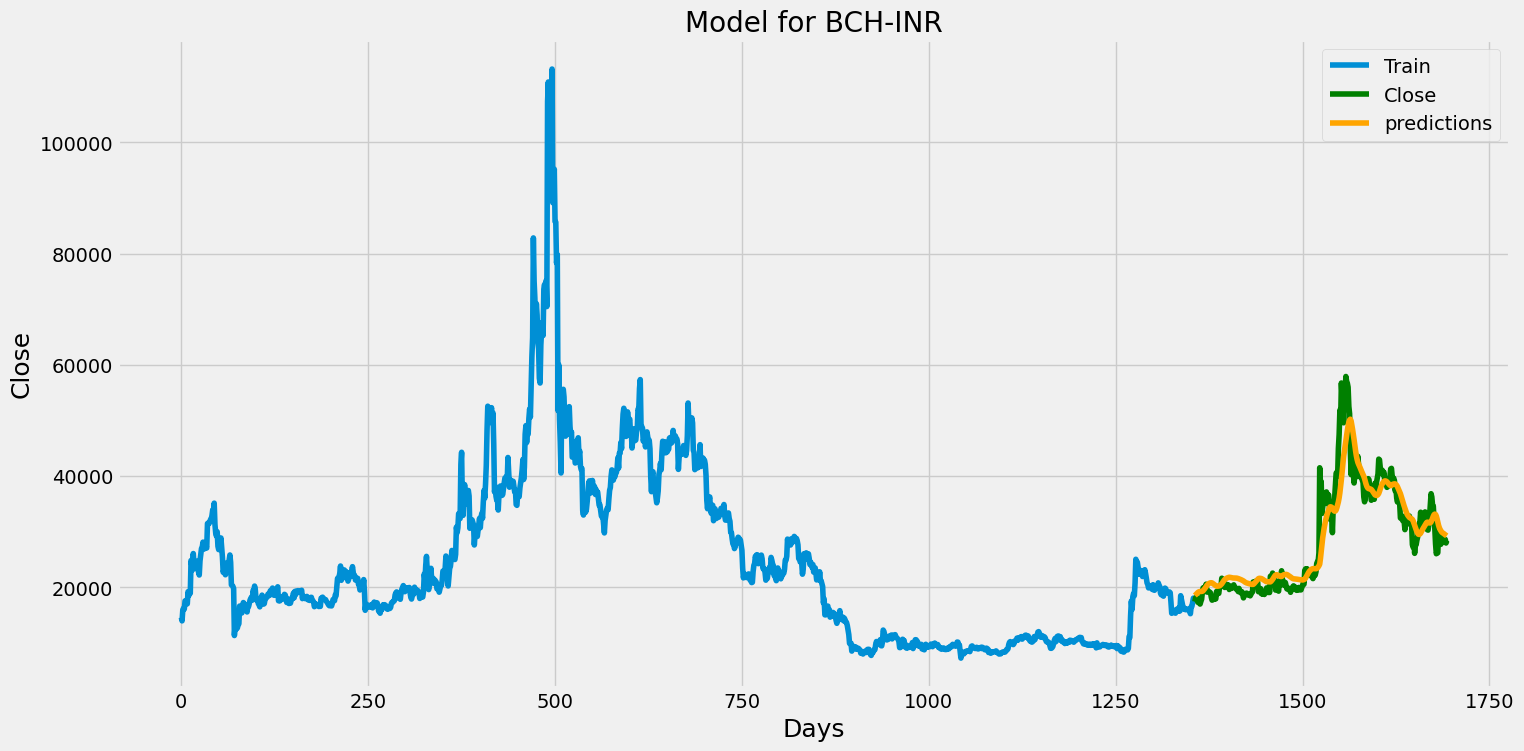

the accuary of model for coin BCH-INR is  99.4456756694516
(1694, 1)
[[0.00473691]
 [0.00395946]
 [0.00482635]
 ...
 [0.76404637]
 [0.74894691]
 [0.78932657]]
i am xtrain [array([0.00473691, 0.00395946, 0.00482635, 0.00510928, 0.0053787 ,
       0.00642408, 0.00653057, 0.00590214, 0.00571257, 0.00630081,
       0.00619673, 0.00665218, 0.00647674, 0.00820078, 0.009405  ,
       0.00877512, 0.01008366, 0.00970631, 0.00915663, 0.00910029,
       0.01011669, 0.00969534, 0.0088169 , 0.00884696, 0.00876018,
       0.00932351, 0.00966825, 0.01012014, 0.00989542, 0.01080244,
       0.01031701, 0.01032596, 0.0106064 , 0.01056908, 0.01015534,
       0.01144067, 0.01315699, 0.01502203, 0.01468054, 0.01776313,
       0.01878067, 0.01928389, 0.02030209, 0.01904094, 0.02019456,
       0.01757379, 0.01674029, 0.01677628, 0.01748599, 0.01539435,
       0.01536451, 0.0153123 , 0.01504686, 0.01610118, 0.01520047,
       0.01304971, 0.01109048, 0.01149279, 0.01132001, 0.01221813])]
i am ytrain [0.0114535

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0865
Epoch 2/2
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0022
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 2821.8826458057347
original test size len 338
the total sum of org 11857397.02734375
the averageof org 35081.05629391642
predicted test size len 338
the total sum of pred 12152408.830078125
the average pred 35953.87227833765
RangeIndex(start=1356, stop=1694, step=1)
RangeIndex(start=0, stop=1356, step=1)


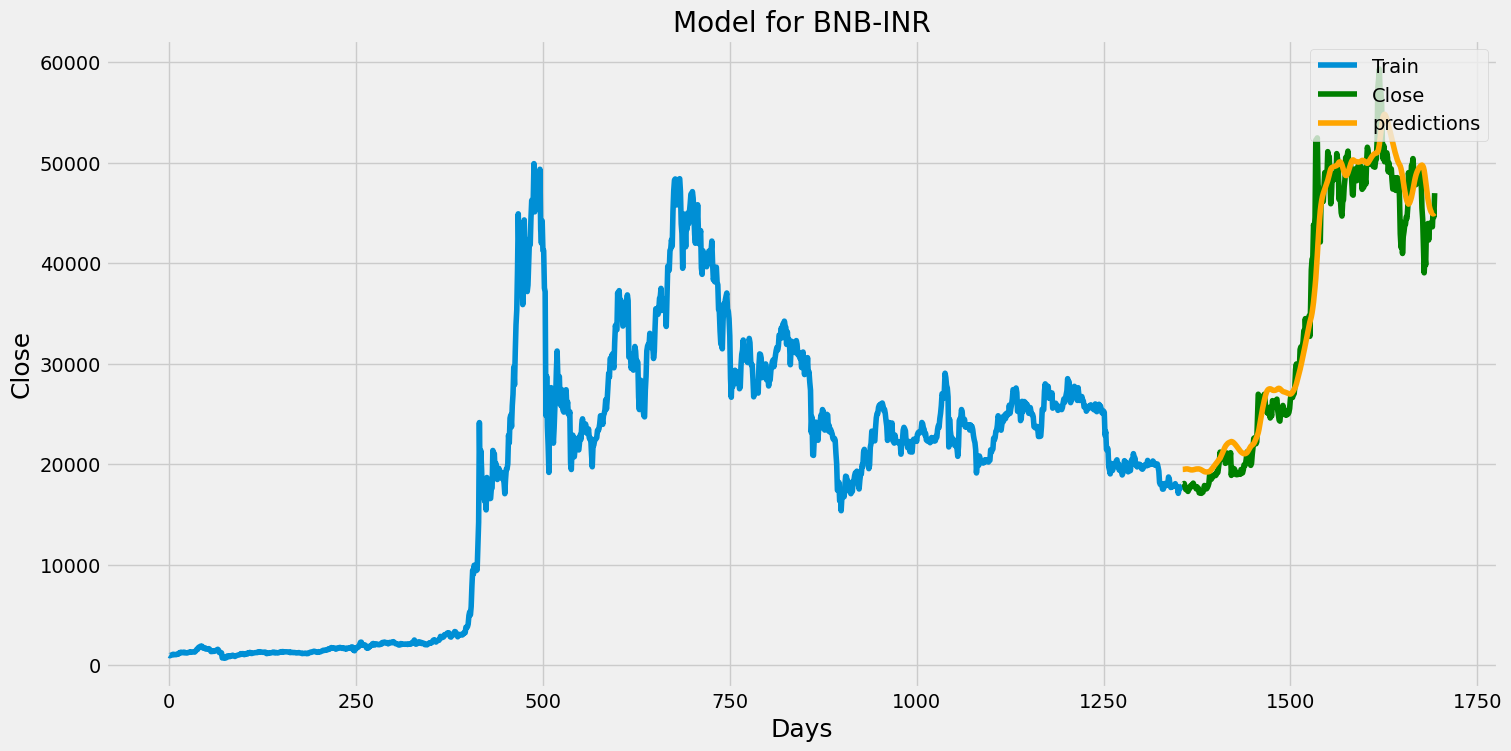

the accuary of model for coin BNB-INR is  97.51200198446537
(1694, 1)
[[0.15985435]
 [0.15017355]
 [0.17407545]
 ...
 [0.05130348]
 [0.05087295]
 [0.05061776]]
i am xtrain [array([0.15985435, 0.15017355, 0.17407545, 0.19044711, 0.1932358 ,
       0.20948329, 0.20140236, 0.19974176, 0.20703052, 0.32885189,
       0.28181139, 0.31458143, 0.33463414, 0.90434598, 0.65110175,
       0.65373015, 0.59380764, 0.50834557, 0.57207259, 0.62888419,
       0.65978984, 0.64614904, 0.53359291, 0.55162441, 0.53980868,
       0.56829214, 0.62978798, 0.61488533, 0.59988936, 0.62742041,
       0.56565061, 0.58010433, 0.5756969 , 0.58332284, 0.56144465,
       0.62388703, 0.61752711, 0.61968032, 0.7134217 , 0.74542125,
       0.74820901, 0.77348243, 0.78137924, 0.76336251, 0.76936468,
       0.65302765, 0.59705582, 0.64988081, 0.65136341, 0.60456899,
       0.59947301, 0.60868869, 0.58768803, 0.62015683, 0.58210108,
       0.53965398, 0.45743293, 0.4611176 , 0.43995403, 0.43136496])]
i am ytrain [0.469224

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.0111
Epoch 2/2
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0011
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
RMSE: 815.0348117736273
original test size len 338
the total sum of org 1717499.0551757812
the averageof org 5081.358151407637
predicted test size len 338
the total sum of pred 1804176.5502929688
the average pred 5337.800444653753
RangeIndex(start=1356, stop=1694, step=1)
RangeIndex(start=0, stop=1356, step=1)


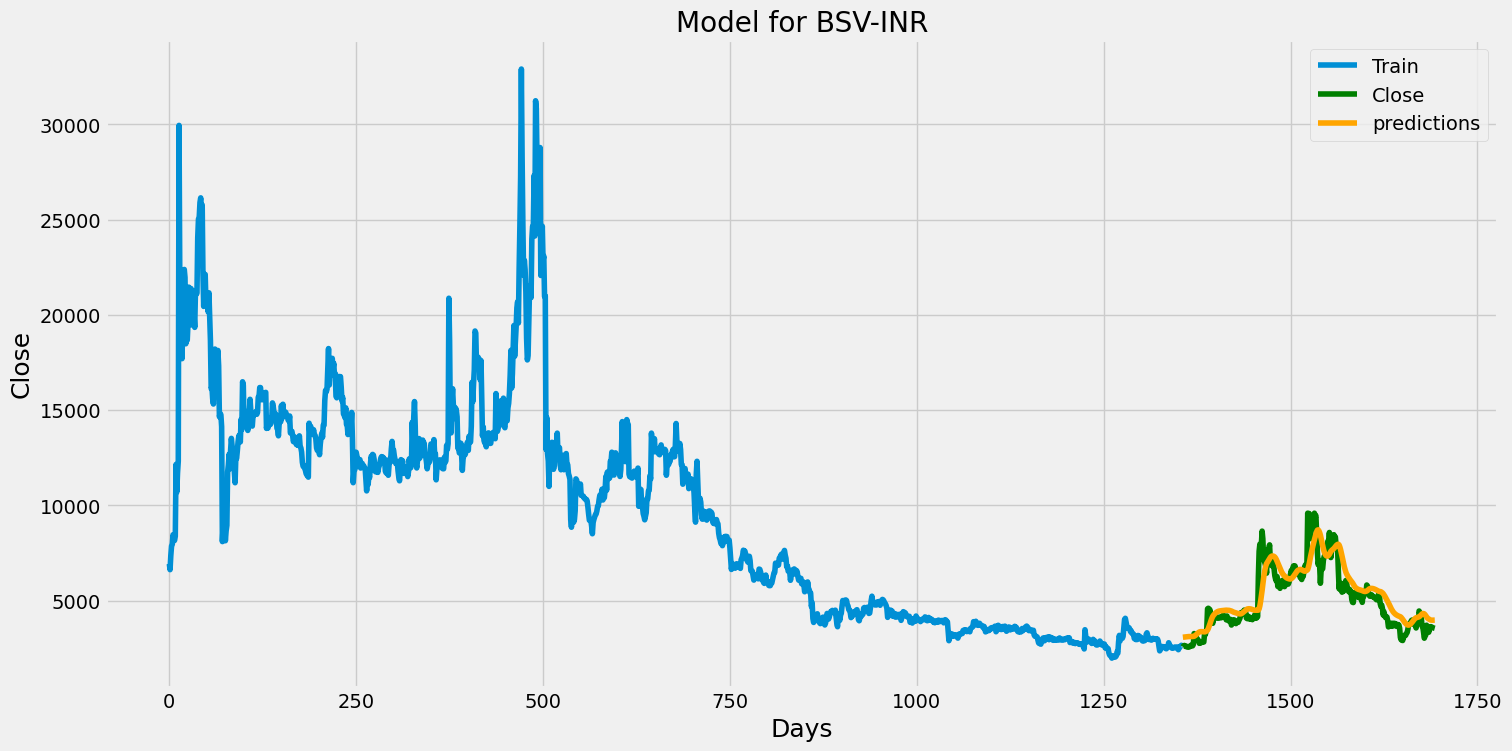

the accuary of model for coin BSV-INR is  94.95327261718253
(1694, 1)
[[0.00316009]
 [0.00250975]
 [0.00405662]
 ...
 [0.60736278]
 [0.60716372]
 [0.61294823]]
i am xtrain [array([0.00316009, 0.00250975, 0.00405662, 0.004242  , 0.00449239,
       0.00616399, 0.00607704, 0.00539239, 0.00482353, 0.00575983,
       0.00553548, 0.00613802, 0.00570473, 0.01018779, 0.01018122,
       0.00991635, 0.01126426, 0.01220181, 0.01048768, 0.01051358,
       0.01110944, 0.01078795, 0.00979373, 0.00981633, 0.00945358,
       0.01084862, 0.01149498, 0.01250705, 0.0122715 , 0.01438801,
       0.01341812, 0.01414112, 0.01515832, 0.01531944, 0.01507671,
       0.0181892 , 0.01991952, 0.02218743, 0.02227397, 0.0233918 ,
       0.02221277, 0.02473213, 0.03081111, 0.03134247, 0.03485193,
       0.03084029, 0.02984607, 0.03104841, 0.0344312 , 0.02989125,
       0.02970846, 0.03129542, 0.03061915, 0.03298005, 0.03133935,
       0.02761113, 0.0228976 , 0.02313246, 0.02344781, 0.02201214])]
i am ytrain [0.021829

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0318
Epoch 2/2
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0016
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step
RMSE: 29457.492003643223
original test size len 338
the total sum of org 77359083.0859375
the averageof org 228873.0268814719
predicted test size len 338
the total sum of pred 84905194.203125
the average pred 251198.79941752958
RangeIndex(start=1356, stop=1694, step=1)
RangeIndex(start=0, stop=1356, step=1)


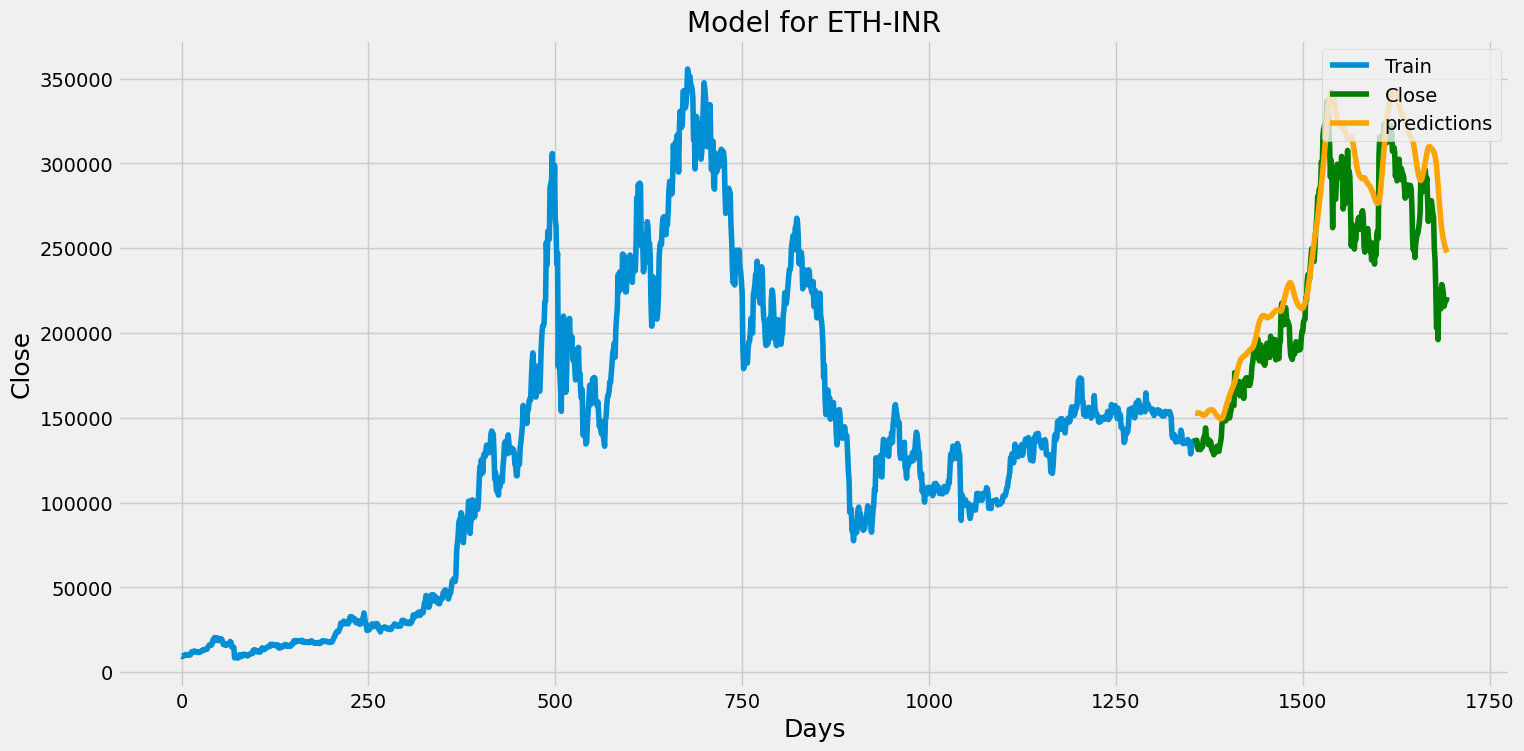

the accuary of model for coin ETH-INR is  90.2453457096892
(1694, 1)
[[0.02653447]
 [0.02071428]
 [0.02849238]
 ...
 [0.12933829]
 [0.12549977]
 [0.12545183]]
i am xtrain [array([0.02653447, 0.02071428, 0.02849238, 0.03100485, 0.0316342 ,
       0.03793418, 0.03991518, 0.03687167, 0.03523376, 0.0444572 ,
       0.04586299, 0.05082155, 0.04670207, 0.07075462, 0.0693038 ,
       0.06863542, 0.07939354, 0.07371873, 0.0693397 , 0.06768601,
       0.06921335, 0.07098903, 0.06127562, 0.06099418, 0.05870811,
       0.0656047 , 0.07287422, 0.07762617, 0.0761609 , 0.09898829,
       0.09803412, 0.10611399, 0.10449699, 0.10278783, 0.0978837 ,
       0.10985037, 0.11261928, 0.11587892, 0.12168206, 0.12339923,
       0.11520552, 0.12135978, 0.13430082, 0.13176559, 0.13964416,
       0.12183967, 0.11810252, 0.11240157, 0.12344637, 0.10732488,
       0.10385476, 0.11443974, 0.11908701, 0.13124435, 0.12066851,
       0.10814604, 0.07957893, 0.0809874 , 0.07728718, 0.07390127])]
i am ytrain [0.0722742

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0039
Epoch 2/2
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - loss: 0.0032
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step
RMSE: 425.2624445125917
original test size len 338
the total sum of org 2102670.01953125
the averageof org 6220.917217548077
predicted test size len 338
the total sum of pred 2091396.9970703125
the average pred 6187.565080089682
RangeIndex(start=1356, stop=1694, step=1)
RangeIndex(start=0, stop=1356, step=1)


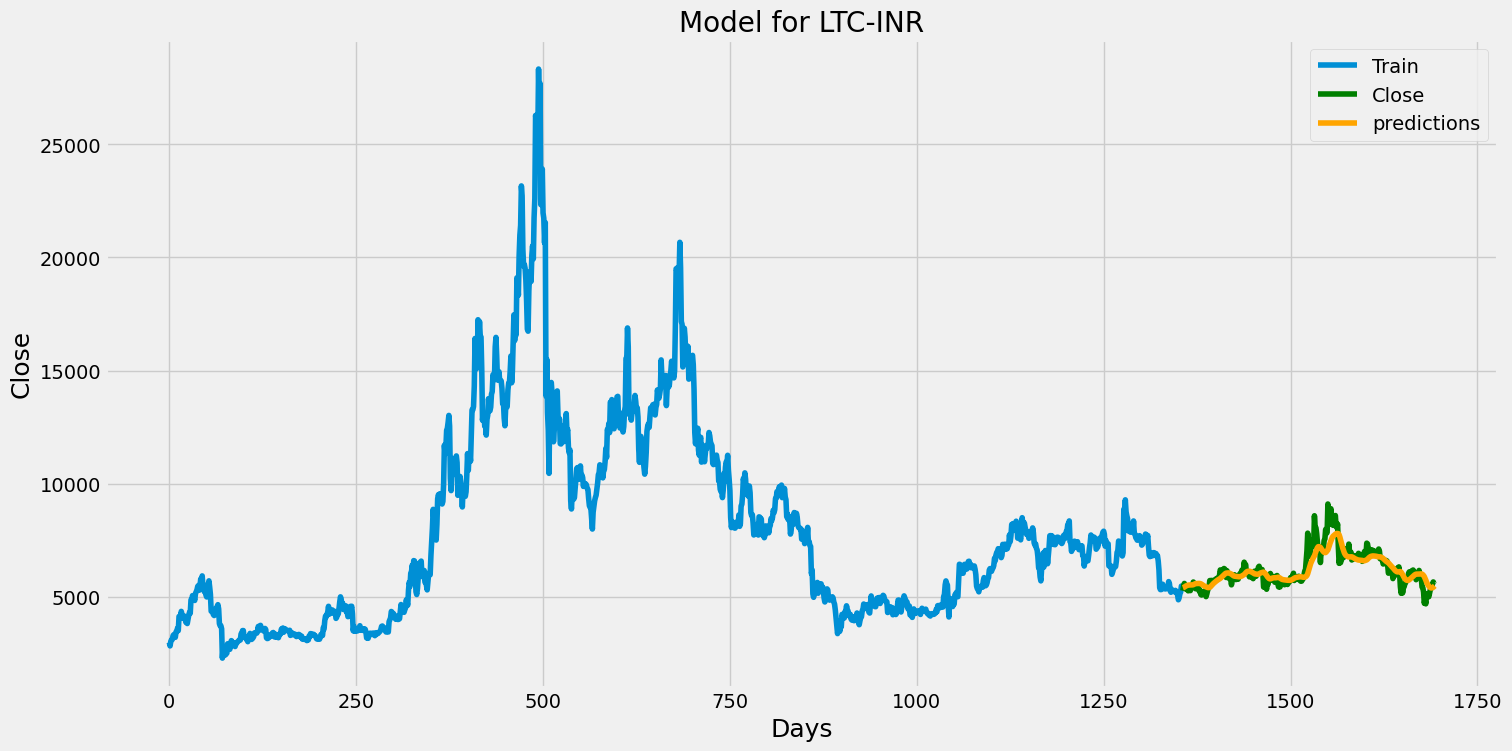

the accuary of model for coin LTC-INR is  99.46387106125903


In [29]:
# columns_var1 = data1.columns
for i in data1.columns:
  # create a new dataframe with only the Close column
  data = data1[i]
  data.index = range(0,len(df))
  # convert the dataframe to numpy array
  dataset = data.values
  dataset = dataset.reshape(-1, 1)
  # get the number to train the model on
  training_data_len = math.ceil(len(dataset) * 0.8)
  print(dataset.shape)
  model,acc_of_model,rmse = scaling_and_model_function(dataset,i,training_data_len)
  print("the accuary of model for coin {} is ".format(i),acc_of_model)

# FINAL OUTPUT

In [30]:
#future predict price
def tommorow_pred_func(dataset,model,colname):
  #get the quote
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data=scaler.fit_transform(dataset)
  #last 60days close value and convert it into array
  last_60_days=dataset[-60:]
  #scale the data between 0 and 1
  last_60_days_scaled = scaler.transform(last_60_days)
  #create an empty list
  X_test =[]
  #append 60 values to X_test
  X_test.append(last_60_days_scaled)
  #convert the X_test df to array
  X_test=np.array(X_test)
  #reshape the data
  X_test =np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
  #get the predicted scale value
  pred_price = model.predict(X_test)
  #undo the scaling
  pred_price= scaler.inverse_transform(pred_price)
  print(f"The coin is {i}, today's expected close price is {pred_price}")
  return pred_price

In [31]:
# columns_var1 = data1.columns
for i in data1.columns:
  print("the coin is ", i)
  # create a new dataframe with only the Close column
  data = data1[i]
  data.index = range(0,len(df))
  # convert the dataframe to numpy array
  dataset = data.values
  dataset = dataset.reshape(-1, 1)
  # get the number to train the model on
  training_data_len = math.ceil(len(dataset) * 0.8)
  tommorow_pred_func(dataset,model,i)

the coin is  BCH-INR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The coin is BCH-INR, today's expected close price is [[27190.98]]
the coin is  BNB-INR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
The coin is BNB-INR, today's expected close price is [[36360.07]]
the coin is  BSV-INR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The coin is BSV-INR, today's expected close price is [[4299.395]]
the coin is  ETH-INR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
The coin is ETH-INR, today's expected close price is [[185374.77]]
the coin is  LTC-INR
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
The coin is LTC-INR, today's expected close price is [[5524.2153]]


In [32]:
# #GETTING EXACT PRICE
# from pycoingecko import CoinGeckoAPI
# cg = CoinGeckoAPI()
# symbol = "bitcoin"
# currency = "inr"
# price = cg.get_price(ids=symbol, vs_currencies=currency)
# print(price[symbol][currency])